# Label Analytics

In [1]:
from utilities.data_factory import *
import matplotlib.pyplot as plt
import matplotlib.ticker
import numpy as np
from scipy.stats import norm
from collections import Counter

In [2]:
# Use 0050 as example
df = read_one_file(input_file_name='step1_0050.csv.pklz')
labels_col = get_raw_labels()

2021-12-25 02:11:16.995 | helper   | INFO     | data_access.py          :   25 | Got /Users/anthonywah/Projects/mafs6100_short_term_alpha/input_data/step1_0050.csv.pklz with 2013927 rows and 298 columns


___

### Distributions

In [3]:
labels_df = df[labels_col].dropna()
labels_df *= 10000  # in bps

2021-12-25 02:11:17.303 | helper   | INFO     | 499410676.py            :    4 | Plotting del_M_30
2021-12-25 02:11:17.423 | helper   | INFO     | 499410676.py            :    4 | Plotting del_M_60
2021-12-25 02:11:17.533 | helper   | INFO     | 499410676.py            :    4 | Plotting del_M_90
2021-12-25 02:11:17.645 | helper   | INFO     | 499410676.py            :    4 | Plotting del_M_120
2021-12-25 02:11:17.756 | helper   | INFO     | 499410676.py            :    4 | Plotting del_M_150
2021-12-25 02:11:17.866 | helper   | INFO     | 499410676.py            :    4 | Plotting del_M_300
2021-12-25 02:11:17.975 | helper   | INFO     | 499410676.py            :    4 | Plotting del_M_450
2021-12-25 02:11:18.090 | helper   | INFO     | 499410676.py            :    4 | Plotting del_M_600
2021-12-25 02:11:18.201 | helper   | INFO     | 499410676.py            :    4 | Plotting del_M_750
2021-12-25 02:11:18.368 | helper   | INFO     | 499410676.py            :    4 | Plotting del_M_900


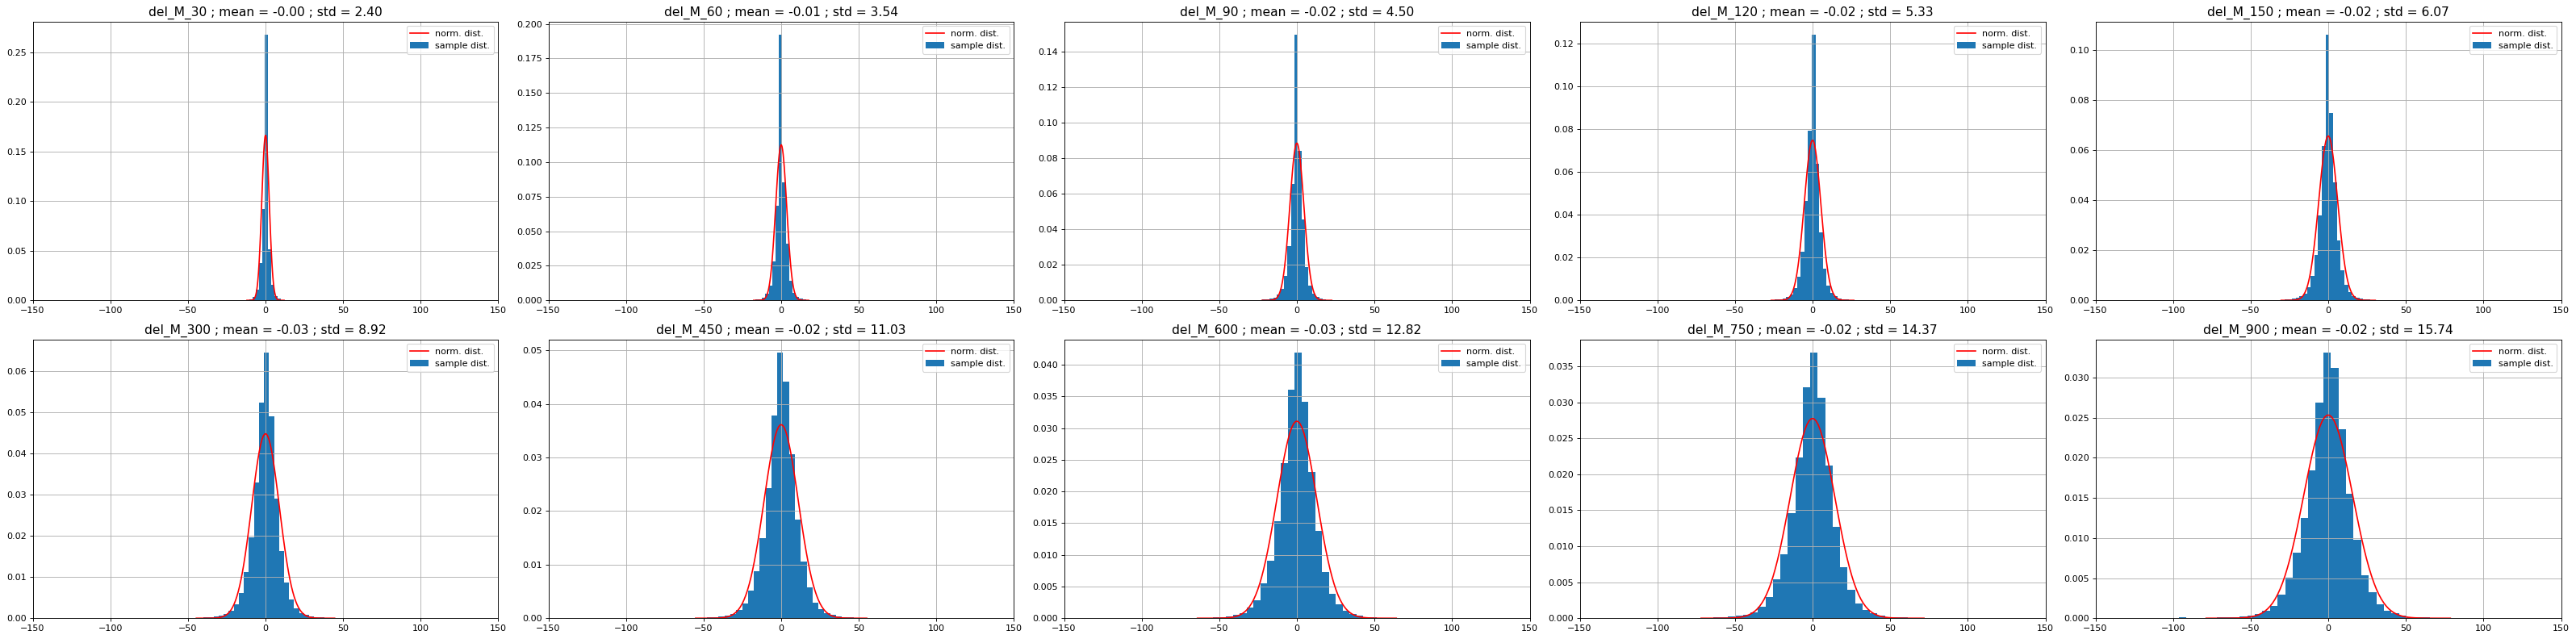

In [4]:
fig = plt.figure(figsize=(40, 10), dpi=80)
count = 1
for i in labels_col:
    log_info(f'Plotting {i}')
    fig.add_subplot(2, 5, count)
    count += 1
    s = labels_df[i]
    s_mean, s_std = s.mean(), s.std()
    x_min, x_max = s_mean - 5 * s_std, s_mean + 5 * s_std
    x_series = np.linspace(x_min, x_max, 100)
    plt.hist(s, bins=100, density=True, label='sample dist.')
    plt.plot(x_series, norm.pdf(x_series, s_mean, s_std), color='red', label='norm. dist.')
    plt.xlim(xmin=-150, xmax=150)
    plt.title(f'{i} ; mean = {s_mean:.2f} ; std = {s_std:.2f}', fontsize=14)
    plt.legend()
    plt.grid(True)
plt.tight_layout()
plt.show()

___

___

### Classification Plot

Histogram plots with different number of bins. Useful for classification tasks

In [7]:
def plot_pcts(input_pcts):
    fig = plt.figure(figsize=(40, 10), dpi=80)
    count = 1
    for i in labels_col:
        log_info(f'Plotting {i}')
        fig.add_subplot(2, 5, count)
        count += 1
        target_classes = get_classifications(labels_df[i], input_pcts)
        s_mean = labels_df[i].mean()
        s_std = labels_df[i].std()
        c = Counter(target_classes)
        x = list(sorted(set(target_classes)))
        plt.bar(x, [c[i] for i in x])
        plt.title(f'{i} ; mean = {s_mean:.2f} ; std = {s_std:.2f}', fontsize=14)
        plt.grid(True)
    plt.tight_layout()
    plt.show()

\# of bins = 3 (0, 25, 75, 100 percentiles)

2021-12-25 02:12:27.100 | helper   | INFO     | 3519119063.py           :    5 | Plotting del_M_30
2021-12-25 02:12:28.942 | helper   | INFO     | 3519119063.py           :    5 | Plotting del_M_60
2021-12-25 02:12:30.746 | helper   | INFO     | 3519119063.py           :    5 | Plotting del_M_90
2021-12-25 02:12:32.595 | helper   | INFO     | 3519119063.py           :    5 | Plotting del_M_120
2021-12-25 02:12:34.382 | helper   | INFO     | 3519119063.py           :    5 | Plotting del_M_150
2021-12-25 02:12:36.274 | helper   | INFO     | 3519119063.py           :    5 | Plotting del_M_300
2021-12-25 02:12:38.285 | helper   | INFO     | 3519119063.py           :    5 | Plotting del_M_450
2021-12-25 02:12:40.254 | helper   | INFO     | 3519119063.py           :    5 | Plotting del_M_600
2021-12-25 02:12:42.224 | helper   | INFO     | 3519119063.py           :    5 | Plotting del_M_750
2021-12-25 02:12:44.162 | helper   | INFO     | 3519119063.py           :    5 | Plotting del_M_900


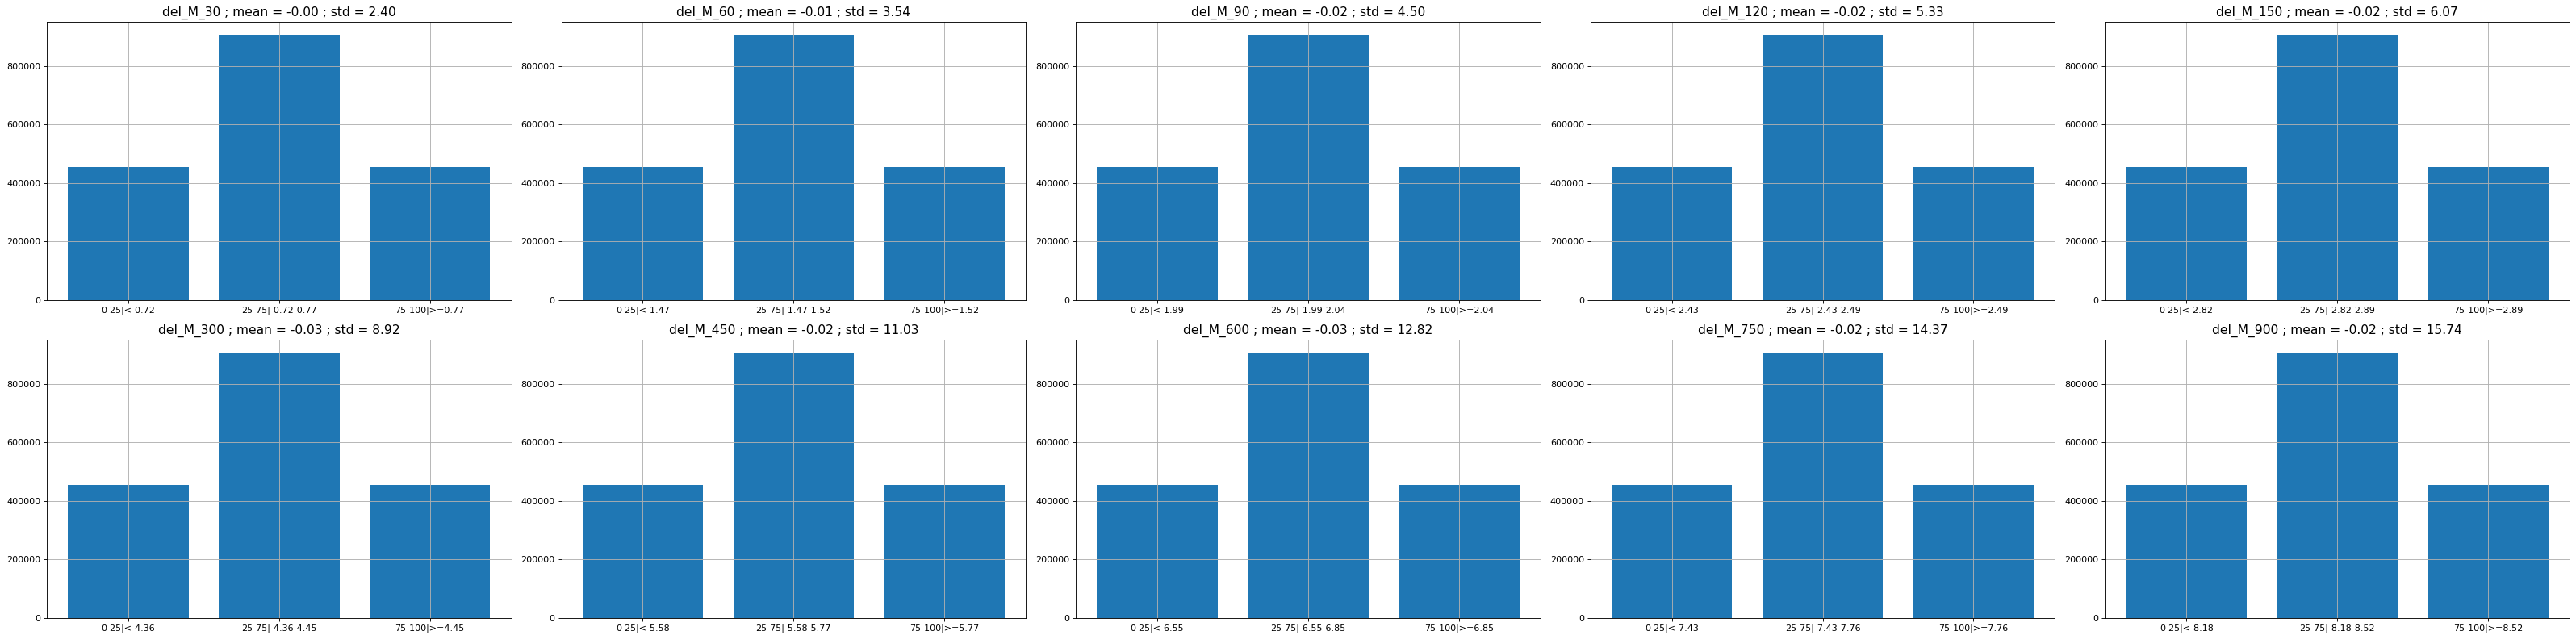

In [8]:
plot_pcts([0, 25, 75, 100])

\# of bins = 3 (0, 30, 70, 100 percentiles)

2021-12-25 02:12:46.887 | helper   | INFO     | 3519119063.py           :    5 | Plotting del_M_30
2021-12-25 02:12:48.744 | helper   | INFO     | 3519119063.py           :    5 | Plotting del_M_60
2021-12-25 02:12:50.536 | helper   | INFO     | 3519119063.py           :    5 | Plotting del_M_90
2021-12-25 02:12:52.374 | helper   | INFO     | 3519119063.py           :    5 | Plotting del_M_120
2021-12-25 02:12:54.341 | helper   | INFO     | 3519119063.py           :    5 | Plotting del_M_150
2021-12-25 02:12:56.258 | helper   | INFO     | 3519119063.py           :    5 | Plotting del_M_300
2021-12-25 02:12:58.214 | helper   | INFO     | 3519119063.py           :    5 | Plotting del_M_450
2021-12-25 02:13:00.296 | helper   | INFO     | 3519119063.py           :    5 | Plotting del_M_600
2021-12-25 02:13:02.376 | helper   | INFO     | 3519119063.py           :    5 | Plotting del_M_750
2021-12-25 02:13:04.271 | helper   | INFO     | 3519119063.py           :    5 | Plotting del_M_900


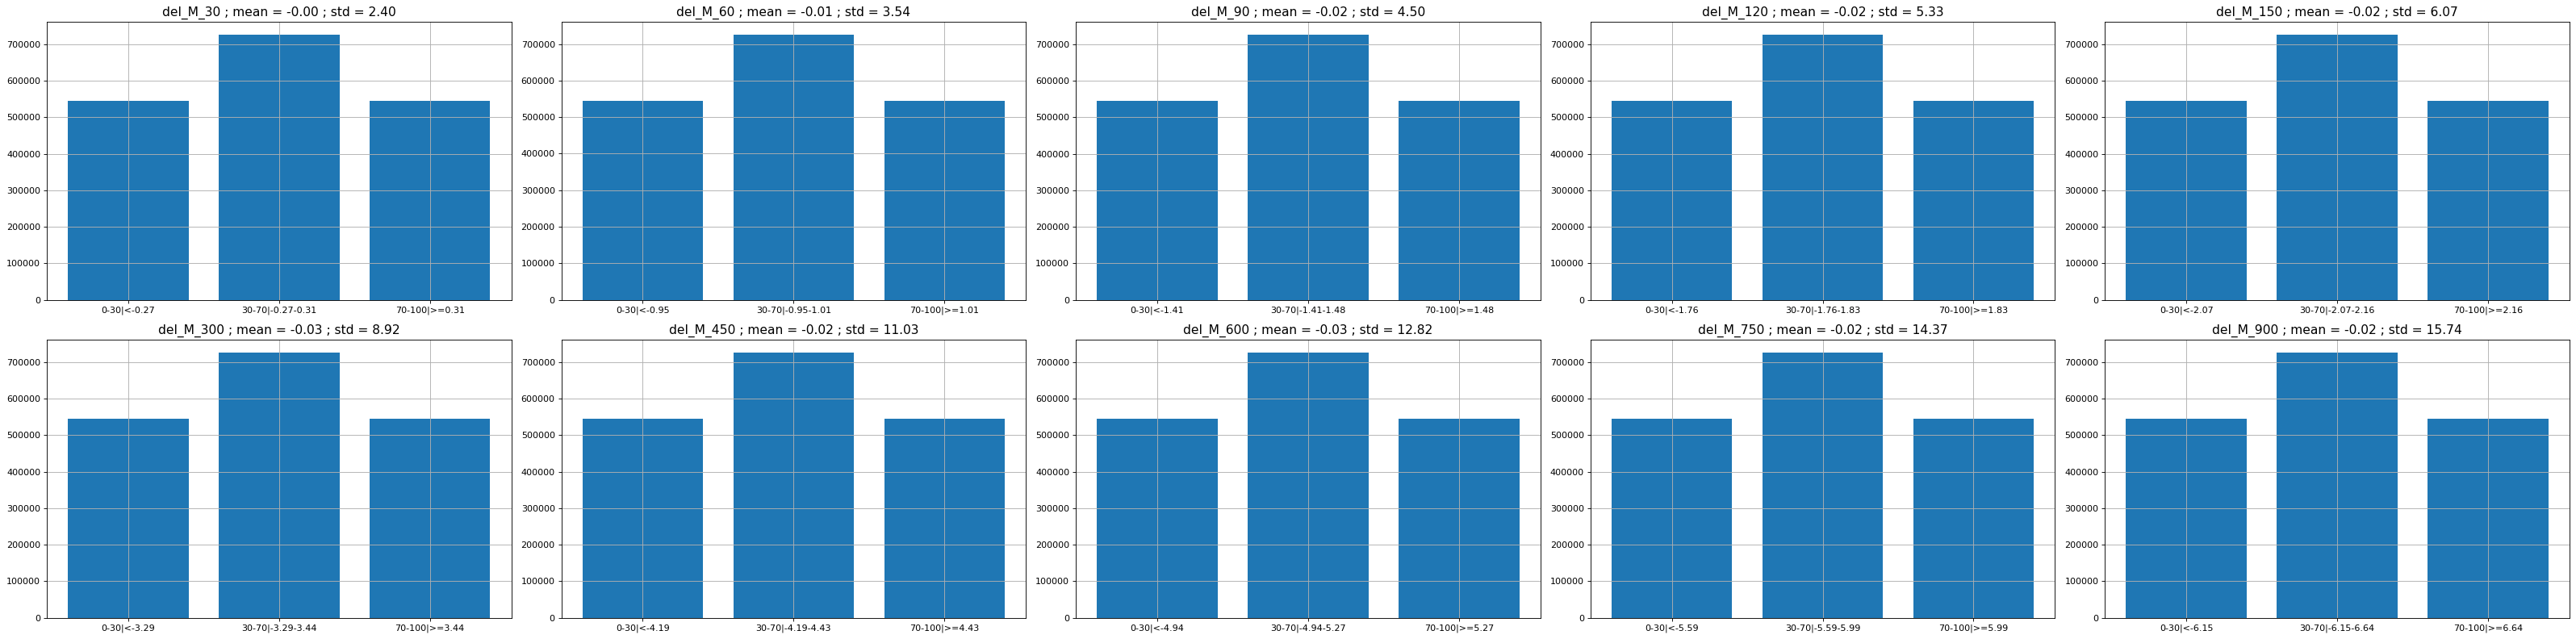

In [9]:
plot_pcts([0, 30, 70, 100])

\# of bins = 5 (0, 20, 40, 60, 80, 100 percentiles)

2021-12-25 02:13:07.012 | helper   | INFO     | 3519119063.py           :    5 | Plotting del_M_30
2021-12-25 02:13:09.170 | helper   | INFO     | 3519119063.py           :    5 | Plotting del_M_60
2021-12-25 02:13:11.340 | helper   | INFO     | 3519119063.py           :    5 | Plotting del_M_90
2021-12-25 02:13:13.496 | helper   | INFO     | 3519119063.py           :    5 | Plotting del_M_120
2021-12-25 02:13:15.693 | helper   | INFO     | 3519119063.py           :    5 | Plotting del_M_150
2021-12-25 02:13:18.084 | helper   | INFO     | 3519119063.py           :    5 | Plotting del_M_300
2021-12-25 02:13:20.568 | helper   | INFO     | 3519119063.py           :    5 | Plotting del_M_450
2021-12-25 02:13:23.189 | helper   | INFO     | 3519119063.py           :    5 | Plotting del_M_600
2021-12-25 02:13:25.359 | helper   | INFO     | 3519119063.py           :    5 | Plotting del_M_750
2021-12-25 02:13:27.506 | helper   | INFO     | 3519119063.py           :    5 | Plotting del_M_900


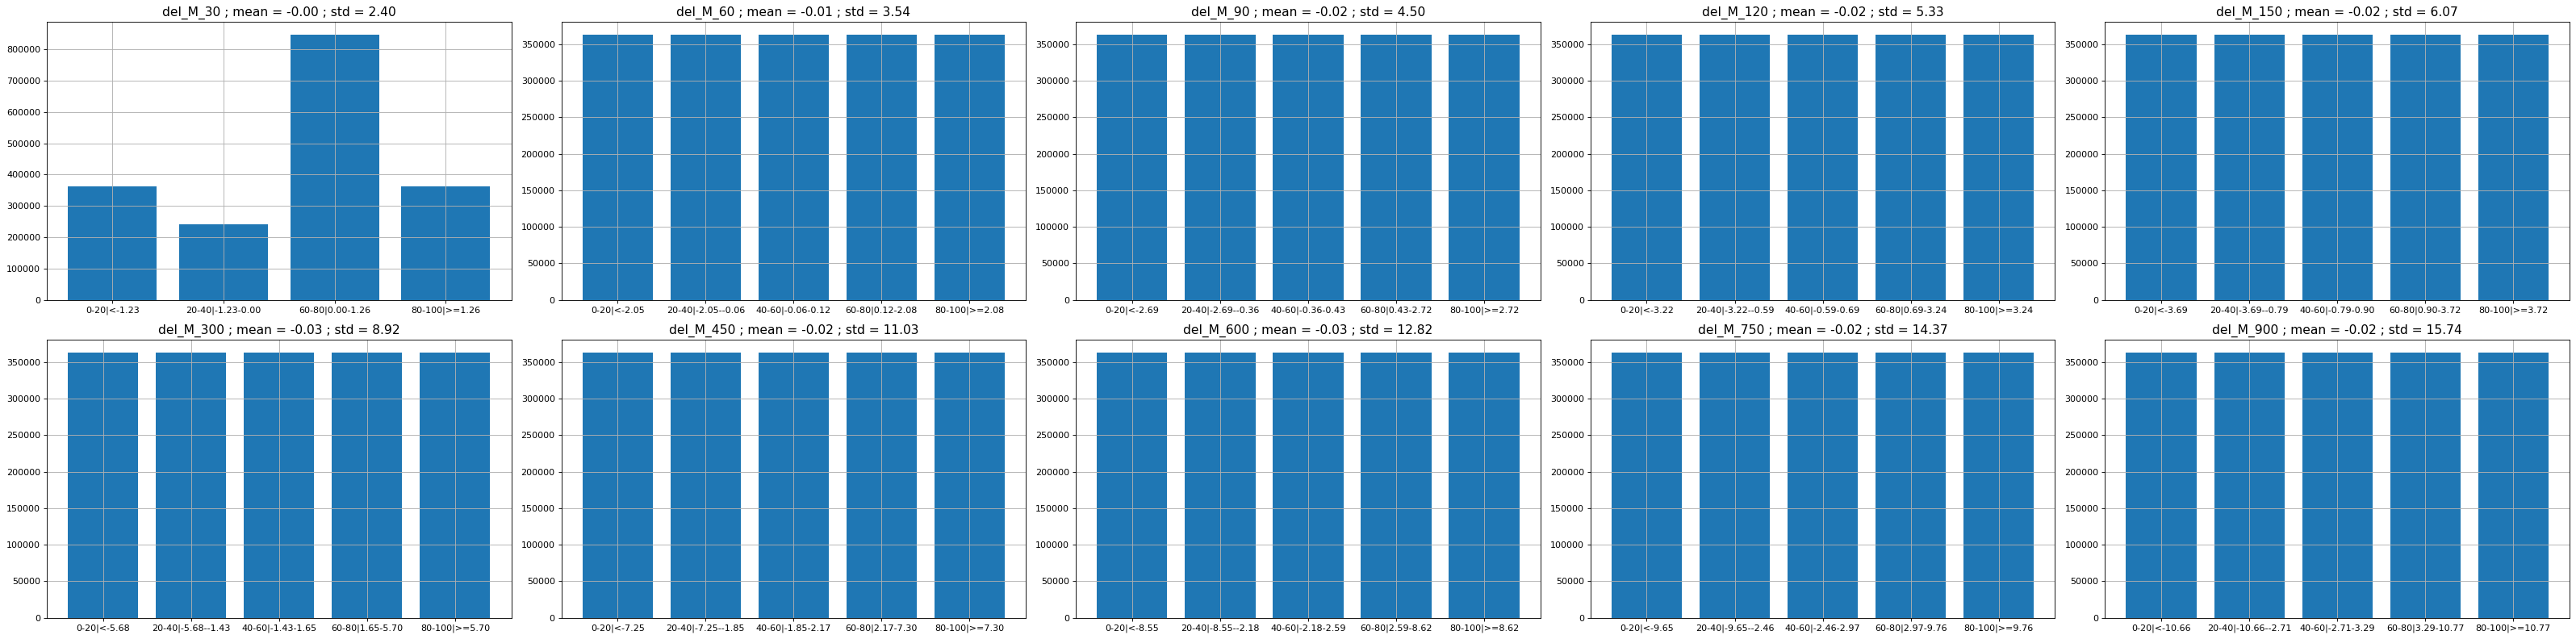

In [10]:
plot_pcts([0, 20, 40, 60, 80, 100])